In [1]:
from IPython.display import Image
import ee, folium
ee.Initialize()

In [15]:
area_of_interest = ee.Geometry.Rectangle([60, 5, 100,40])
mexico_landcover_2010_landsat = ee.Image("users/renekope/MEX_LC_2010_Landsat_v43").clip(area_of_interest)
landsat8_collection = ee.ImageCollection('LANDSAT/LC8_L1T_TOA').filterDate('2016-01-01', '2018-04-19').min()
landsat8_collection = landsat8_collection.slice(0,9)

In [16]:
image = landsat8_collection.clip(area_of_interest)

In [17]:
band_arrs = image.sampleRectangle(region=area_of_interest)

In [18]:
# Get individual band arrays.
band_arr_b4 = band_arrs.get('B4')
band_arr_b5 = band_arrs.get('B5')
band_arr_b6 = band_arrs.get('B6')

In [20]:
# import numpy as np
# # Transfer the arrays from server to client and cast as np array.
# np_arr_b4 = np.array(band_arr_b4.getInfo())
# np_arr_b5 = np.array(band_arr_b5.getInfo())
# np_arr_b6 = np.array(band_arr_b6.getInfo())
# print(np_arr_b4.shape)
# print(np_arr_b5.shape)
# print(np_arr_b6.shape)

In [11]:
# Expand the dimensions of the images so they can be concatenated into 3-D.
np_arr_b4 = np.expand_dims(np_arr_b4, 2)
np_arr_b5 = np.expand_dims(np_arr_b5, 2)
np_arr_b6 = np.expand_dims(np_arr_b6, 2)
print(np_arr_b4.shape)
print(np_arr_b5.shape)
print(np_arr_b6.shape)

(2, 1, 1)
(2, 1, 1)
(2, 1, 1)


(2, 1, 3)


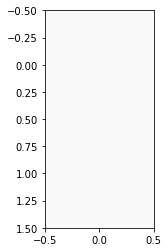

In [13]:
import matplotlib.pyplot as plt
# Stack the individual bands to make a 3-D array.
rgb_img = np.concatenate((np_arr_b6, np_arr_b5, np_arr_b4), 2)
print(rgb_img.shape)

# Scale the data to [0, 255] to show as an RGB image.
rgb_img_test = (255*((rgb_img - 100)/3500)).astype('uint8')
plt.imshow(rgb_img_test)
plt.show()